# Calculate a trailing stop loss using the ATR indicator

## Imports

In [1]:
%load_ext dotenv
%dotenv ../.env

%load_ext autoreload
%autoreload 2


In [2]:

from investmentstk.figures import candlestick
from investmentstk.figures.common import show_figure
from investmentstk.formulas.average_true_range import average_true_range_trailing_stop
from investmentstk.models.asset import Asset
from investmentstk.models.barset import barset_to_ohlc_dataframe

## Input

In [3]:
# Set this to True when running locally to get interactive charts
# When publishing the notebook on GitHub, we need static images
IS_INTERACTIVE = False

volvo = Asset.from_id('AV:5269')
barset = volvo.retrieve_prices()
dataframe = barset_to_ohlc_dataframe(barset)

2021-09-11 14:50:32,689 — investmentstk — INFO — [Asset] Creating asset from ID: AV:5269
2021-09-11 14:50:32,690 — investmentstk — DEBUG — [AssetCache] Creating a new instance of AssetCache
2021-09-11 14:50:32,695 — investmentstk — DEBUG — [AssetCache] Local cache is empty. Retrieving a copy from remote
2021-09-11 14:50:33,087 — investmentstk — DEBUG — [Asset] Found in local cache


## Calculation

In [4]:
dataframe = average_true_range_trailing_stop(dataframe, periods=21, multiplier=3)

## Plot

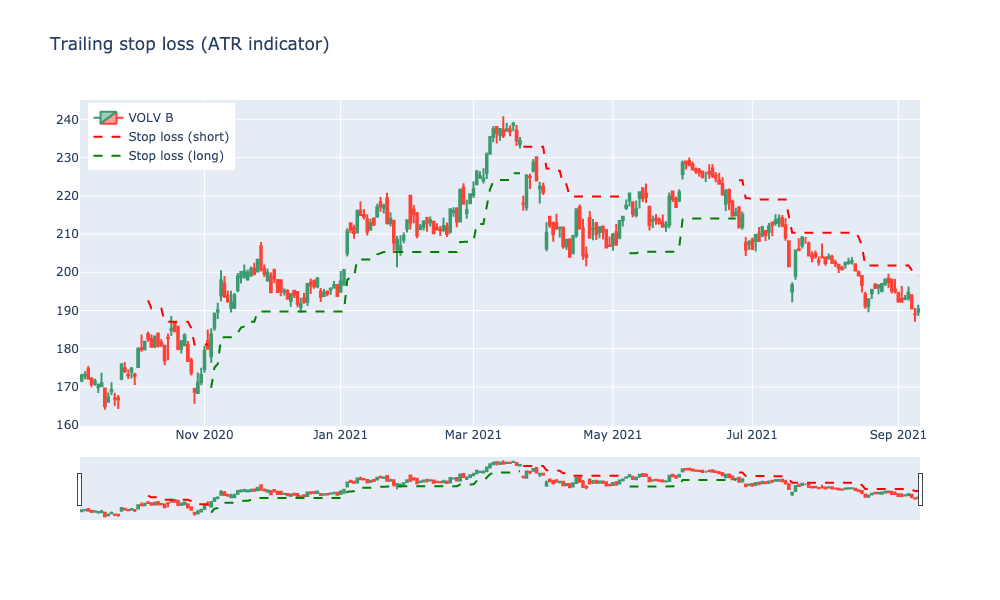

In [5]:
figure = candlestick.generate_figure(dataframe, volvo)
figure.update_layout(width=1000, height=600)
show_figure(figure, interactive=IS_INTERACTIVE)